## **Assignment Two (EECS3405 F25)**

**Simon Posluns (221541727):**    

**simonp22@my.yorku.ca**

This assignment is mainly for you to review linear methods or simple discriminative models. You have to work individually. Remember to fill in your information (name, student number, email) at above.


##**What to Submit**

Please use this notebook to complete this assignment. You have to run your codes and show the results in this notebook. Download the completed notenook as `.ipynb` and compress it as a `.zip` file to submit to eClass.  Submit only ONE notebook file that contains all of your answers and codes to eClass before the deadline.  No late submission
will be accepted.

* For all written parts, write your answers in text cells. To avoid confusions in marking, better to embed latex codes there to represent all mathematical notations and equations.  **No handwriting is accepted**.

* For programming parts, you should give codes, comments, explanations and the proper running outputs in both code and text cells. Make your jupyter notebook clean and concise. Remove all unused codes and all intermediate results from the submitted notebook. The submitted notebook should include only the final (best) outputs for each question. Also make sure every code cell runnable so that markers can reproduce the outputs if necessary.

### **Q1** (20 marks) **Linear Discriminant Analysis (LDA)**


**Part 1.1** (10 marks) Use the method of Lagrange multipliers to derive the solution to LDA on the lecture notes.




**Part 1.1 Solution**

\begin{align*}
\text{Problem:}\quad & \hat{w} = \arg\max_{w} \frac{w^{\top} S_b w}{w^{\top} S_w w}
\end{align*}


Equivalent constrained form setting $w^TS_ww = 1$:

\begin{align*}\quad & \max_{w}; w^{\top} S_b w \quad\text{subject to}\quad w^{\top} S_w w = 1 \end{align*}


Lagrangian:

\begin{align*}
\quad & L(w, \lambda) = w^{\top} S_b w - \lambda \bigl(w^{\top} S_w w - 1\bigr)
\end{align*}

Gradient with respect to w:
\begin{align*}
\frac{\partial L}{\partial w} = 2 S_b w - 2 \lambda S_w w = 0
\end{align*}

Simplify:
\begin{align*}
S_b w = \lambda S_w w
\end{align*}

In this case, we assume $S_w$ is invertible:

\begin{align*}
S_w^{-1}S_b w &= \lambda S_wS_w^{-1} w \\
S_w^{-1}S_b w &= \lambda I w \\
S_w^{-1} S_b w &= \lambda w \\
\end{align*}


$w$  is an eigenvector of the matrix  $(S_w^{-1}, S_b)$, with eigen value λ.

Thus $\hat{w}$ is an eigenvector of $S_w^{-1} S_b$ corresponding to *largest* eigenvalue.

To maximize the original  quotient  $\frac{w^{\top} S_b w}{w^{\top} S_w w}$, we choose the eigenvector corresponding to the largest eigenvalue:

Given:
$S_b w = \lambda S_w w$

We know:
$\frac{\lambda w^{\top} S_w w}{w^{\top} S_w w} = λ$

Thus the quotient which maximizes the relation between $S_b$ (between matrix scatter) and $S_w$ (within matrix scatter) will be the quotient pertaining to the largest possible value of λ.

For multiple projection directions, the columns of $W$ are the eigenvectors corresponding to the top $(K-1)$ eigenvalues (because $S_b$ has rank at most $K-1$).

**Part 1.2** (10 marks) Following [the given PCA examples](https://colab.research.google.com/drive/1_0pfK2QOtoL1OeaFzNRiCN7SqKNAOQGG),
use all training images of four digits ('1', '3', '6', and '9') in MNIST to estimate LDA projection matrices for all possible LDA dimensions. What are the maximum LDA dimensions you can use in this case?
What if you only use all training images of three digits ('3', '6', and '9')?
Use LDA to project all images into 2D and/or 3D space, and compare its visualization with those of PCA and t-SNE.

Processing file 1Jf2XqGR7y1fzOZNKLJiom7GmZZUzXhfs t10k-images-idx3-ubyte
Processing file 1qiYu9dW3ZNrlvTFO5fI4qf8Wtr8K-pCu t10k-labels-idx1-ubyte
Processing file 1SnWvBcUETRJ53rEJozFUUo-hOQFPKxjp train-images-idx3-ubyte
Processing file 1kKEIi_pwVHmabByAnwZQsaMgro9XiBFE train-labels-idx1-ubyte
First set X1.shape: (24740, 784)
Maximum LDA dimensions: 3


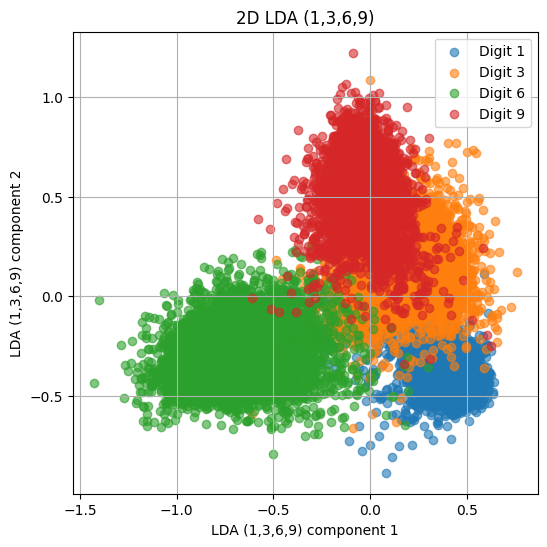

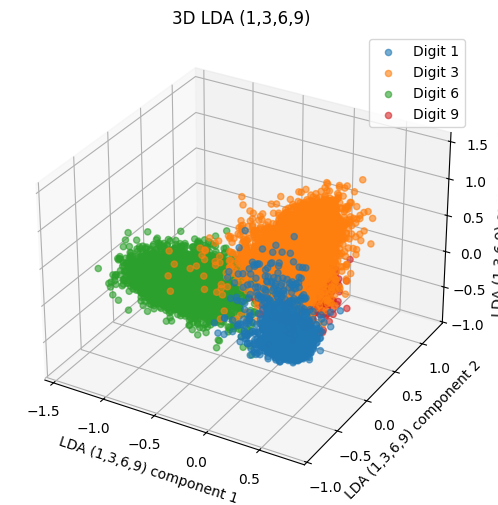

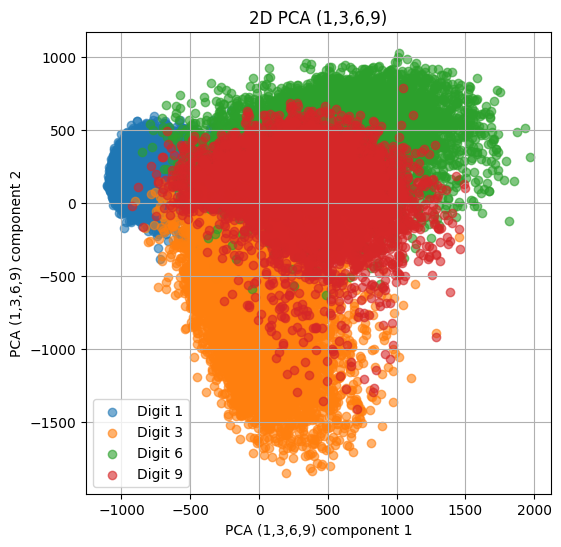

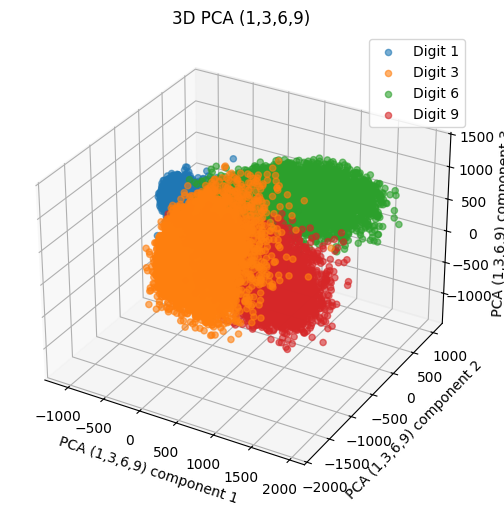

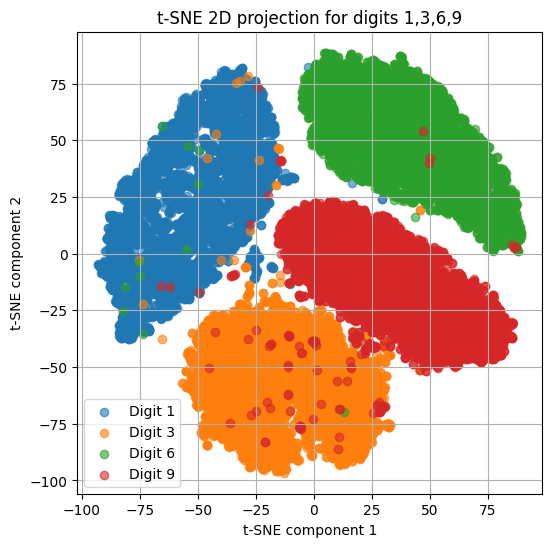

Second set X2.shape: (17998, 784)
Maximum LDA dimensions: 2


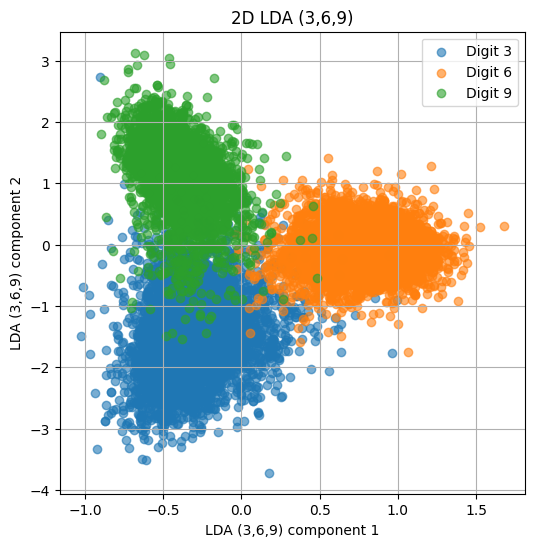

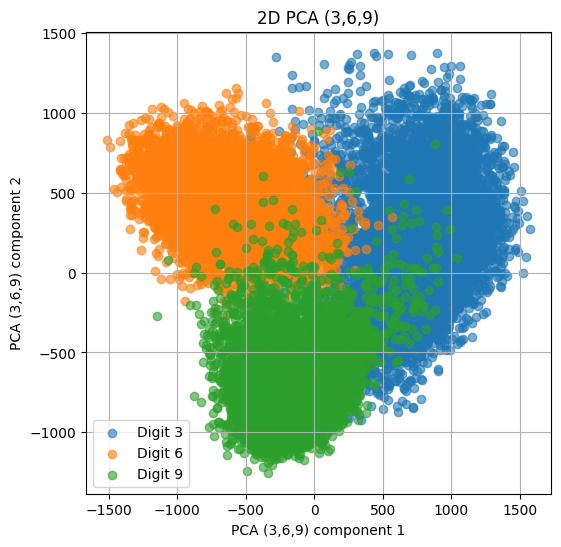

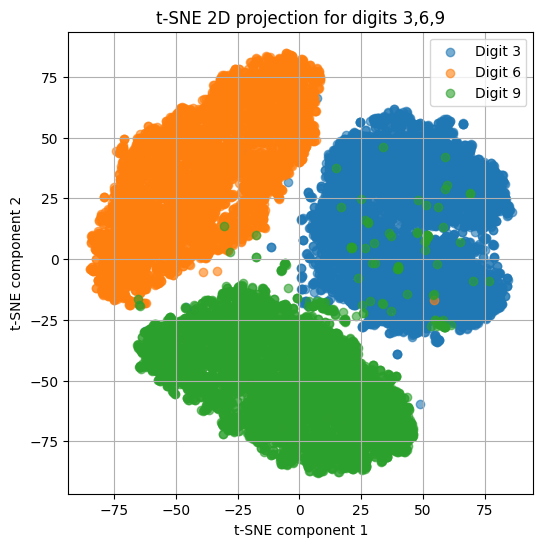

In [9]:
!gdown --folder https://drive.google.com/drive/folders/1r20aRjc2iu9O3kN3Xj9jNYY2uMgcERY1 2> /dev/null
!pip install python_mnist

from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Load MNIST data
mnist_loader = MNIST('MNIST')
train_data, train_label = mnist_loader.load_training()
train_data = np.array(train_data)
train_label = np.array(train_label)

#plotting functions:
def plot_2d_3d(X, y, title_prefix="Projection"):
    """Plot 2D and 3D scatter plots for first 2 and 3 columns of X."""
    # 2D
    plt.figure(figsize=(6,6))
    for c in np.unique(y):
        plt.scatter(X[y==c, 0], X[y==c, 1], label=f'Digit {c}', alpha=0.6)
    plt.title(f"2D {title_prefix}")
    plt.xlabel(f"{title_prefix} component 1")
    plt.ylabel(f"{title_prefix} component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 3D: only plots 3d if there are enough dimensions in data set X
    if X.shape[1] >= 3:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        for c in np.unique(y):
            ax.scatter(X[y==c, 0], X[y==c, 1], X[y==c, 2], label=f'Digit {c}', alpha=0.6)
        ax.set_title(f"3D {title_prefix}")
        ax.set_xlabel(f"{title_prefix} component 1")
        ax.set_ylabel(f"{title_prefix} component 2")
        ax.set_zlabel(f"{title_prefix} component 3")
        ax.legend()
        plt.show()


#returns the within class scatter and between class scatter matrices
def lda_matrices(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mu = np.mean(X, axis=0)
    S_w = np.zeros((n_features, n_features))
    S_b = np.zeros((n_features, n_features))
    for k in classes:
        X_k = X[y==k]
        mu_k = np.mean(X_k, axis=0)
        S_w += (X_k - mu_k).T @ (X_k - mu_k)
        C_k = X_k.shape[0]
        diff = (mu_k - mu).reshape(-1,1)
        S_b += C_k * (diff @ diff.T)
    return S_w, S_b


#returns the lda projections as a set of eigenvectors and their related eigenvalues
def lda_projection(S_w, S_b, num_components=None):
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(S_w) @ S_b)
    idx = np.argsort(-np.real(eigenvalues))
    eigenvectors = np.real(eigenvectors[:, idx])
    eigenvalues = np.real(eigenvalues[idx])
    if num_components is not None:
        eigenvectors = eigenvectors[:, :num_components]
        eigenvalues = eigenvalues[:num_components]
    return eigenvectors, eigenvalues

#creates a pca model
def apply_pca(X, y, n_components=3, title_prefix="PCA"):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    plot_2d_3d(X_pca, y, title_prefix)
    return X_pca

#applies LDA using helper functions
def apply_lda(X, y, n_components=None, title_prefix="LDA"):
    S_w, S_b = lda_matrices(X, y)
    W, _ = lda_projection(S_w, S_b, num_components=n_components)
    X_lda = X @ W
    plot_2d_3d(X_lda, y, title_prefix)
    return X_lda

#create tsne visualization for viewing higher dimensional data in 2D
def apply_tsne(X, y, n_components=2, title_prefix="t-SNE"):
    tsne = TSNE(n_components=n_components, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Only 2D plot for t-SNE
    plt.figure(figsize=(6,6))
    for c in np.unique(y):
        plt.scatter(X_tsne[y==c, 0], X_tsne[y==c, 1], label=f'Digit {c}', alpha=0.6)
    plt.title(f"t-SNE 2D projection for {title_prefix}")
    plt.xlabel("t-SNE component 1")
    plt.ylabel("t-SNE component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

    return X_tsne

# Applying functions to datasets

# First set: digits 1,3,6,9
digits1 = [1,3,6,9]
mask1 = np.isin(train_label, digits1)
X1 = train_data[mask1]
y1 = train_label[mask1]

print("First set X1.shape:", X1.shape)
max_lda1 = len(np.unique(y1)) - 1
print(f"Maximum LDA dimensions: {max_lda1}")
X1_lda = apply_lda(X1, y1, n_components=3, title_prefix="LDA (1,3,6,9)")
X1_pca = apply_pca(X1, y1, n_components=3, title_prefix="PCA (1,3,6,9)")
X1_tsne = apply_tsne(X1, y1, n_components=2, title_prefix="digits 1,3,6,9")

# Second set: digits 3,6,9
digits2 = [3,6,9]
mask2 = np.isin(train_label, digits2)
X2 = train_data[mask2]
y2 = train_label[mask2]

print("Second set X2.shape:", X2.shape)
max_lda2 = len(np.unique(y2)) - 1
print(f"Maximum LDA dimensions: {max_lda2}")
X2_lda = apply_lda(X2, y2, n_components=2, title_prefix="LDA (3,6,9)")
X2_pca = apply_pca(X2, y2, n_components=2, title_prefix="PCA (3,6,9)")
X2_tsne = apply_tsne(X2, y2, n_components=2, title_prefix="digits 3,6,9")

### **Q2** (10 marks)  **MCE vs. Logistic Regression**

Revise the given [logistic regression implementation](https://colab.research.google.com/drive/1f5w-RQZIYdL4nlog9QAoSoa62Nivv_8H) to implement minimum classification error (MCE) method to learn a binary classifier to classify two digits ('7' vs. '9') in the MNIST data set. Compare its performance with that of logistic regression and report the best results in the heldout test data of these two digits.

Processing file 1Jf2XqGR7y1fzOZNKLJiom7GmZZUzXhfs t10k-images-idx3-ubyte
Processing file 1qiYu9dW3ZNrlvTFO5fI4qf8Wtr8K-pCu t10k-labels-idx1-ubyte
Processing file 1SnWvBcUETRJ53rEJozFUUo-hOQFPKxjp train-images-idx3-ubyte
Processing file 1kKEIi_pwVHmabByAnwZQsaMgro9XiBFE train-labels-idx1-ubyte

9Training Logistic Regression9
[LR] epoch=01 loss=0.1530 (train=0.951, test=0.953)
[LR] epoch=02 loss=0.1375 (train=0.953, test=0.955)
[LR] epoch=03 loss=0.1310 (train=0.956, test=0.957)
[LR] epoch=04 loss=0.1271 (train=0.958, test=0.959)
[LR] epoch=05 loss=0.1234 (train=0.958, test=0.959)
[LR] epoch=06 loss=0.1228 (train=0.959, test=0.957)
[LR] epoch=07 loss=0.1205 (train=0.959, test=0.961)
[LR] epoch=08 loss=0.1179 (train=0.960, test=0.962)
[LR] epoch=09 loss=0.1170 (train=0.960, test=0.960)
[LR] epoch=10 loss=0.1148 (train=0.961, test=0.960)
[LR] epoch=11 loss=0.1141 (train=0.962, test=0.961)
[LR] epoch=12 loss=0.1133 (train=0.962, test=0.961)
[LR] epoch=13 loss=0.1128 (train=0.962, test=0.962

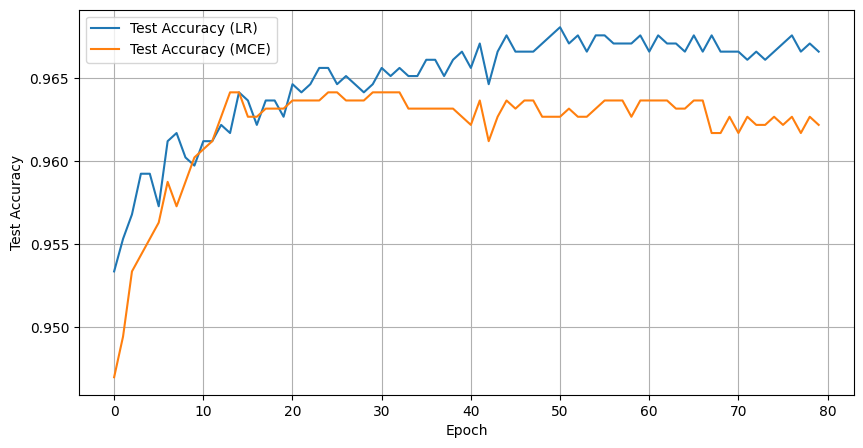

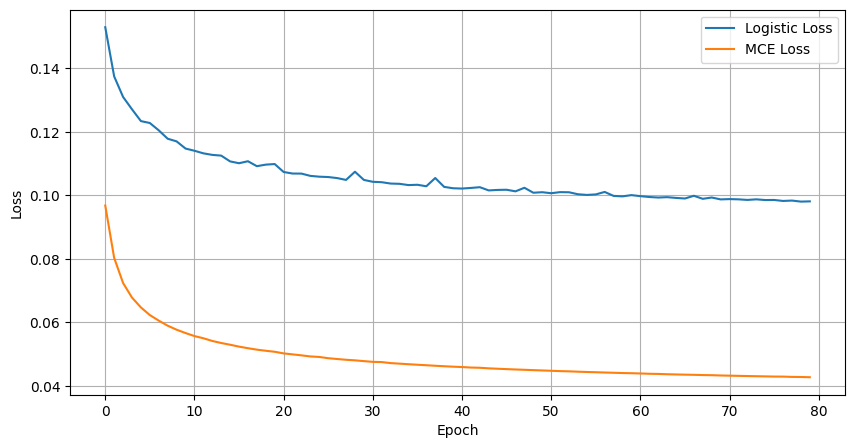

In [ ]:
!pip install python_mnist matplotlib gdown > /dev/null

import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

# Download MNIST
!gdown --folder https://drive.google.com/drive/folders/1r20aRjc2iu9O3kN3Xj9jNYY2uMgcERY1 2> /dev/null


# Load and Prepare Data

mnist_loader = MNIST('MNIST')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()

X_train = np.array(train_data, dtype=float)
y_train = np.array(train_label)
X_test = np.array(test_data, dtype=float)
y_test = np.array(test_label)

# Select digits 7 and 9
digits = [7, 9]
train_mask = np.isin(y_train, digits)
test_mask = np.isin(y_test, digits)

X_train = X_train[train_mask] / 255.0
X_test = X_test[test_mask] / 255.0
y_train = y_train[train_mask]
y_test = y_test[test_mask]

# Map labels: 7 → +1, 9 → -1
y_train = np.where(y_train == 7, 1, -1)
y_test = np.where(y_test == 7, 1, -1)

# Add bias column
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Optimizer and helper functions

class Optimizer():
    def __init__(self, lr, annealing_rate, batch_size, max_epochs):
        self.lr = lr
        self.annealing_rate = annealing_rate
        self.batch_size = batch_size
        self.max_epochs = max_epochs

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#  Logistic Regression (baseline)

def logistic_regression_gd(X, y, X2, y2, op):
    n = X.shape[0]
    w = np.zeros(X.shape[1])
    lr = op.lr

    #vectors initialized with zeros
    errorsA = np.zeros(op.max_epochs)
    errorsB = np.zeros(op.max_epochs)
    errorsC = np.zeros(op.max_epochs)

    for epoch in range(op.max_epochs):
        indices = np.random.permutation(n)
        for batch_start in range(0, n, op.batch_size):
            X_batch = X[indices[batch_start:batch_start + op.batch_size]]
            y_batch = y[indices[batch_start:batch_start + op.batch_size]]

            w_grad = X_batch.T @ (y_batch * sigmoid(y_batch * (X_batch @ w)) - y_batch) / X_batch.shape[0]
            w -= lr * w_grad

        predict = np.sign(X @ w)
        predict2 = np.sign(X2 @ w)
        errorsA[epoch] = np.mean(predict == y)
        errorsB[epoch] = np.mean(predict2 == y2)
        errorsC[epoch] = -np.mean(np.log(sigmoid(y * (X @ w))))
        lr *= op.annealing_rate

        print(f"[LR] epoch={epoch+1:02d} loss={errorsC[epoch]:.4f} (train={errorsA[epoch]:.3f}, test={errorsB[epoch]:.3f})")

    return w, errorsA, errorsB, errorsC

# Minimum Classification Error (MCE)

def logistic_regression_mce(X, y, X2, y2, op):
    n = X.shape[0]
    w = np.zeros(X.shape[1])
    lr = op.lr
    errorsA = np.zeros(op.max_epochs)
    errorsB = np.zeros(op.max_epochs)
    errorsC = np.zeros(op.max_epochs)

    for epoch in range(op.max_epochs):
        indices = np.random.permutation(n)
        for batch_start in range(0, n, op.batch_size):
            X_batch = X[indices[batch_start:batch_start + op.batch_size]]
            y_batch = y[indices[batch_start:batch_start + op.batch_size]]

            # Using w' = -w, gradient becomes
            w_prime = -w

            # for each i in the batch, z is y_i w'^T x_i
            z = y_batch * (X_batch @ w_prime)

            # where b is the batch size, ∇_w' = 1/b[y_i * σ(y_i w'^T x_i) * (1 - σ(y_i w'^T x_i)) * x_i ]
            grad_w_prime = (X_batch.T @ ((y_batch * sigmoid(z) * (1 - sigmoid(z))).reshape(-1, 1))) / X_batch.shape[0]

            # Since w' = -w, we have ∇_w = -∇_w'
            grad_w = -grad_w_prime.flatten()
            w -= lr * grad_w

        # for learning curve C
        # MCE "loss" = mean(l(-y_i w^T x_i))
        errorsC[epoch] = np.mean(sigmoid(-y * (X @ w)))

        # for learning curve A
        predict = np.sign(X @ w)
        errorsA[epoch] = np.count_nonzero(np.equal(predict,y))/y.size

        # for learning curve B
        predict2 = np.sign(X2 @ w)
        errorsB[epoch] = np.count_nonzero(np.equal(predict2,y2))/y2.size

        lr *= op.annealing_rate

        print(f"[MCE] epoch={epoch+1:02d} loss={errorsC[epoch]:.4f} (train={errorsA[epoch]:.3f}, test={errorsB[epoch]:.3f})")

    return w, errorsA, errorsB, errorsC

# Run Experiments

op = Optimizer(lr=0.1, annealing_rate=0.99, batch_size=32, max_epochs=80)

print("\n9Training Logistic Regression9")
w_lr, A_lr, B_lr, C_lr = logistic_regression_gd(X_train, y_train, X_test, y_test, op)

print("\nTraining MCE")
w_mce, A_mce, B_mce, C_mce = logistic_regression_mce(X_train, y_train, X_test, y_test, op)

print("\nFinal Results")
print(f"Logistic Regression:")
print(f"  Test Accuracy: {B_lr[-1]:.3f}")
print(f"  Train Accuracy: {A_lr[-1]:.3f}")
print(f"  Final Loss: {C_lr[-1]:.4f}")

print(f"\nMCE:")
print(f"  Test Accuracy: {B_mce[-1]:.3f}")
print(f"  Train Accuracy: {A_mce[-1]:.3f}")
print(f"  Final Loss: {C_mce[-1]:.4f}")

#heldout test data result (testing on data not included in training set):
if B_lr[-1] > B_mce[-1]:
    print(f"BEST RESULT: Logistic Regression ({B_lr[-1]*100:.1f}%)")
    print(f"Outperforms MCE by {(B_lr[-1] - B_mce[-1])*100:.1f}")
elif B_mce[-1] > B_lr[-1]:
    print(f"BEST RESULT: MCE ({B_mce[-1]*100:.1f}%)")
    print(f"Outperforms Logistic Regression by {(B_mce[-1] - B_lr[-1])*100:.1f}")
else:
    print(f"BEST RESULT: Tie at {B_lr[-1]*100:.1f}%")

#plot figures
plt.figure(figsize=(10,5))
plt.plot(B_lr, label='Test Accuracy (LR)')
plt.plot(B_mce, label='Test Accuracy (MCE)')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(C_lr, label='Logistic Loss')
plt.plot(C_mce, label='MCE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### **Q3** (20 marks)  **Support Vector Machine (SVM)**

**Part 3.1** (10 marks): Use the training data of two digits ('7' and '9') to learn two binary SVM classifiers (one linear SVM and one nonlinear SVM with Gaussian RBF kernel), fine-tuning all hyperparameters (such as $C$ and/or $\gamma$) for the best possible results. Report your  best classification performance in the held-out test data. Compare the `scikit-learn` implementation and [the given PGD optimizer](https://colab.research.google.com/drive/1x0sLi1SNaWK_O-LOeIGoUXdMfjjkj8bY) in terms of classification accuracy and running speed.

PGD Linear SVM: train accuracy = 93.63%, test accuracy = 92.59%, running time = 0.02s
Hyperperameters: C = 0.45, learning rate = 0.1, max epochs = 10 

PGD RBF SVM: train accuracy = 100.00%, test accuracy = 99.07%, running time = 0.31s
Hyperperameters: C = 2, gamma = 0.05, learning rate = 1.0, max epochs = 20 

sklearn Linear SVM: train accuracy = 100.00%, test accuracy = 99.07%, running time = 0.02s

sklearn RBF SVM: train accuracy = 100.00%, test accuracy = 99.07%, running time = 0.04s



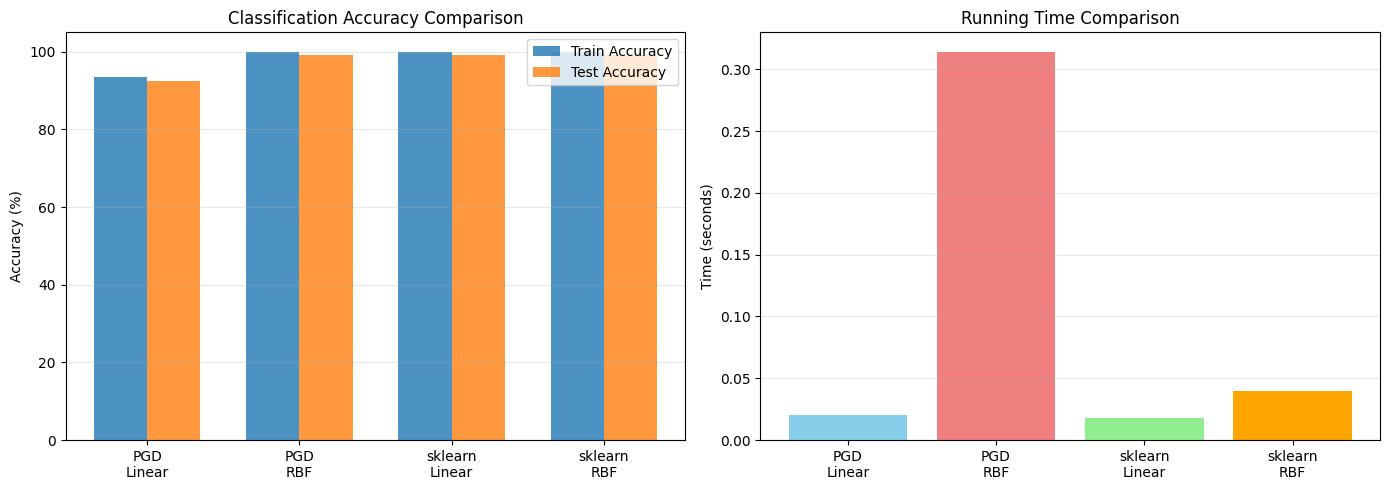

In [8]:
import numpy as np
import time
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data (Digits 7 vs 9)
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Filter digits 7 and 9 only
mask = (y == 7) | (y == 9)

X = X[mask]     # X training data
y = y[mask]     # labels, y consists of just 1s, -1s

# 7 set to +1, 9 set to -1
y = np.where(y == 7, 1, -1)

# Normalize features to have mean=0, std=1
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split to have 70% training, 30% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM Definition
class mySVM2():
  def __init__(self, kernel='linear', optimizer='pgd', debug=0, threshold=0.001, \
               lr=1.0, max_epochs=20, batch_size=2, C=1, order=3, gamma=1.0):
    self.kernel = kernel
    self.optimizer = optimizer
    self.lr = lr
    self.max_epochs = max_epochs
    self.batch_size = batch_size
    self.debug = debug
    self.threshold = threshold
    self.C = C
    self.order = order
    self.gamma = gamma

  def Kernel(self, X, Y):
    if (self.kernel == 'linear'):
      K = X @ Y.T
    elif (self.kernel == 'poly'):
      K = np.power(X @ Y.T +1, self.order)
    elif (self.kernel == 'rbf'):
      d1 = np.sum(X*X, axis=1)
      d2 = np.sum(Y*Y, axis=1)
      K = np.outer(d1, np.ones(Y.shape[0])) + np.outer(np.ones(X.shape[0]), d2) - 2 * X @ Y.T
      K = np.exp(-self.gamma * K)

    return K

  def QuadraticMatrix(self, X, y):
    Q = np.outer(y, y) * self.Kernel(X, X)
    return Q

  def PGD(self, Q, y):
    N = Q.shape[0]
    alpha = np.zeros(N)
    prev_L = 0.0

    for epoch in range(self.max_epochs):
      indices = np.random.permutation(N)
      for batch_start in range(0, N, self.batch_size):
        idx = indices[batch_start:batch_start + self.batch_size]
        alpha_s = alpha[idx]
        y_s = y[idx]

        grad_s = Q[idx,:] @ alpha - np.ones(idx.shape[0])
        proj_grad_s = grad_s - np.dot(y_s,grad_s)/np.dot(y_s, y_s)*y_s

        bound = np.zeros(idx.shape[0])
        bound[proj_grad_s < 0] = self.C

        eta = np.min(np.abs(alpha_s-bound)/(np.abs(proj_grad_s)+0.001))
        alpha[idx] -= min(eta, self.lr) * proj_grad_s

      L = 0.5 * alpha.T @ Q @ alpha - np.sum(alpha)
      if (L > prev_L):
        if (self.debug>0):
          print(f'Early stopping at epoch={epoch}! (reduce learning rate)')
        break

      prev_L = L

    return alpha

  def fit(self, X, y):
    Q = self.QuadraticMatrix(X, y)
    alpha = self.PGD(Q, y)

    self.X_SVs = X[alpha>self.threshold]
    self.y_SVs = y[alpha>self.threshold]
    self.alpha_SVs = alpha[alpha>self.threshold]

    if(self.kernel == 'linear'):
      self.w = (self.y_SVs * self.alpha_SVs) @ self.X_SVs

    idx = np.nonzero(np.logical_and(self.alpha_SVs>self.threshold,self.alpha_SVs<self.C-self.threshold))
    if(len(idx) == 0):
      idx = np.nonzero(self.alpha_SVs>self.threshold)

    b = self.y_SVs[idx] - (self.y_SVs * self.alpha_SVs) @ self.Kernel(self.X_SVs, self.X_SVs[idx])
    self.b = np.median(b)
    return

  def predict(self, X):
    if(self.kernel == 'linear'):
      y = X @ self.w + self.b
    else:
      y = (self.y_SVs * self.alpha_SVs) @ self.Kernel(self.X_SVs, X) + self.b
    return np.sign(y)

#Train / evaluate PGD SVMs

def accuracy(y_true, y_pred):
  return np.count_nonzero(y_true == y_pred) / len(y_true)

# Containers for results
methods = ['PGD\nLinear', 'PGD\nRBF', 'sklearn\nLinear', 'sklearn\nRBF']
train_accs = []
test_accs = []
times = []

# Linear SVM PGD
start = time.time()
regularization1=0.45
learningRate1=0.1
maxEpochs1=10
svm_linear = mySVM2(kernel='linear', C=regularization1, lr=learningRate1, max_epochs=maxEpochs1)
svm_linear.fit(X_train, y_train)
train_pred = svm_linear.predict(X_train)
test_pred = svm_linear.predict(X_test)
end = time.time()

train_accs.append(100 * accuracy(y_train, train_pred))
test_accs.append(100 * accuracy(y_test, test_pred))
times.append(end - start)

print(f"PGD Linear SVM: train accuracy = {100*accuracy(y_train, train_pred):.2f}%, test accuracy = {100*accuracy(y_test, test_pred):.2f}%, running time = {end-start:.2f}s")
print(f"Hyperperameters: C = {regularization1}, learning rate = {learningRate1}, max epochs = {maxEpochs1} " )
print()


"""

#grid search used to find best hyperperameters

C_values = [0.4,0.45, 0.5]
lr_values = [0.1]
epochs_values = [22,25,27,28,29,30]

best_test_acc = 0
best_params = {}

for C in C_values:
    for lr in lr_values:
        for max_epochs in epochs_values:
            start = time.time()
            svm_linear = mySVM2(kernel='linear', C=C, lr=lr, max_epochs=max_epochs)
            svm_linear.fit(X_train, y_train)
            end = time.time()

            # Predictions
            train_pred = svm_linear.predict(X_train)
            test_pred = svm_linear.predict(X_test)

            # Accuracies
            train_acc = accuracy(y_train, train_pred)
            test_acc = accuracy(y_test, test_pred)

            # Track best based on test accuracy
            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_train_acc = train_acc
                best_params = {'C': C, 'lr': lr, 'max_epochs': max_epochs}

            # Print current run
            print(f"PGD Linear SVM: train accuracy = {100*train_acc:.2f}%, "
                  f"test accuracy = {100*test_acc:.2f}%, "
                  f"running time = {end-start:.2f}s, "
                  f"params: C={C}, lr={lr}, max_epochs={max_epochs}")

# Summary
print("\nBest hyperparameters (based on test accuracy):", best_params)
print(f"Train accuracy: {100*best_train_acc:.2f}%")
print(f"Test accuracy: {100*best_test_acc:.2f}%")
"""


# Guassian RBF SVM PGD
regularization2 = 2;
learningRate2 = 1.0
gamma2 = 0.05
maxEpochs2 = 20
start = time.time()
svm_rbf = mySVM2(kernel='rbf', C=regularization2, gamma=gamma2, lr=learningRate2, max_epochs=maxEpochs2)
svm_rbf.fit(X_train, y_train)
train_pred = svm_rbf.predict(X_train)
test_pred = svm_rbf.predict(X_test)
end = time.time()

train_accs.append(100 * accuracy(y_train, train_pred))
test_accs.append(100 * accuracy(y_test, test_pred))
times.append(end - start)

print(f"PGD RBF SVM: train accuracy = {100*accuracy(y_train, train_pred):.2f}%, test accuracy = {100*accuracy(y_test, test_pred):.2f}%, running time = {end-start:.2f}s")
print(f"Hyperperameters: C = {regularization2}, gamma = {gamma2}, learning rate = {learningRate2}, max epochs = {maxEpochs2} " )
print()

# Compare to scikit-learn SVMs

# Linear SVM sklearn
start = time.time()
clf_linear = SVC(kernel='linear', C=2)
clf_linear.fit(X_train, y_train)
train_pred = clf_linear.predict(X_train)
test_pred = clf_linear.predict(X_test)
end = time.time()

train_accs.append(100 * accuracy(y_train, train_pred))
test_accs.append(100 * accuracy(y_test, test_pred))
times.append(end - start)
print(f"sklearn Linear SVM: train accuracy = {100*accuracy(y_train, train_pred):.2f}%, test accuracy = {100*accuracy(y_test, test_pred):.2f}%, running time = {end-start:.2f}s")
print()


# RBF SVM sklearn
start = time.time()
clf_rbf = SVC(kernel='rbf', C=2, gamma=0.05)
clf_rbf.fit(X_train, y_train)
train_pred = clf_rbf.predict(X_train)
test_pred = clf_rbf.predict(X_test)
end = time.time()
train_accs.append(100 * accuracy(y_train, train_pred))
test_accs.append(100 * accuracy(y_test, test_pred))
times.append(end - start)
print(f"sklearn RBF SVM: train accuracy = {100*accuracy(y_train, train_pred):.2f}%, test accuracy = {100*accuracy(y_test, test_pred):.2f}%, running time = {end-start:.2f}s")
print()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
x = np.arange(len(methods))
width = 0.35
ax1.bar(x - width/2, train_accs, width, label='Train Accuracy', alpha=0.8)
ax1.bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Classification Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(methods)
ax1.legend()
ax1.set_ylim([0, 105])
ax1.grid(axis='y', alpha=0.3)

# Runtime comparison
ax2.bar(methods, times, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Running Time Comparison')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


**Part 3.2** (10 marks):  Implement the majority voting method (considering to use the one vs. one strategy) to extend binary RBF nonlinear SVM classifier to a 10-class classifier. Use all training data of 10 digits in MNIST,
and fine-tune all hyperparameters and report your best classification performance in the held-out test set.
(**Note: Starting this step early is advisable due to its time-consuming nature, which involves learning many SVMs. Avoid postponing it until the last minute.**)

In [10]:
!pip install python_mnist > /dev/null
from mnist import MNIST
from datasets import load_dataset
import numpy as np
import time
from itertools import combinations

# Load MNIST data
trainset = load_dataset('mnist', split='train')
train_data = trainset['image']
train_label = trainset['label']

testset = load_dataset('mnist', split='test')
test_data = testset['image']
test_label = testset['label']

train_data = np.array(train_data, dtype='float')/255 # norm to [0,1]
train_data = np.reshape(train_data,(60000,28*28))
train_label = np.array(train_label, dtype='short')
test_data = np.array(test_data, dtype='float')/255 # norm to [0,1]
test_data = np.reshape(test_data,(10000,28*28))
test_label = np.array(test_label, dtype='short')

class mySVM2():
  def __init__(self, kernel='linear', optimizer='pgd', debug=0, threshold=0.001, \
               lr=1.0, max_epochs=20, batch_size=2, C=1, order=3, gamma=1.0):
    self.kernel = kernel
    self.optimizer = optimizer
    self.lr = lr
    self.max_epochs = max_epochs
    self.batch_size = batch_size
    self.debug = debug
    self.threshold = threshold
    self.C = C
    self.order = order
    self.gamma = gamma

  def Kernel(self, X, Y):
    if self.kernel == 'linear':
      K = X @ Y.T
    elif self.kernel == 'poly':
      K = np.power(X @ Y.T + 1, self.order)
    elif self.kernel == 'rbf':
      d1 = np.sum(X*X, axis=1)
      d2 = np.sum(Y*Y, axis=1)
      K = np.outer(d1, np.ones(Y.shape[0])) + np.outer(np.ones(X.shape[0]), d2) - 2 * X @ Y.T
      K = np.exp(-self.gamma * K)
    return K

  def QuadraticMatrix(self, X, y):
    return np.outer(y, y) * self.Kernel(X, X)

   # use projected gradient descent to solve quadratic program
  # refer to Algorithm 6.5 on page 127
  # Q[N,N]: quadratic matrix;  y[N]: training labels (+1 or -1)
  def PGD(self, Q, y):
    N = Q.shape[0]   # num of training samples
    alpha = np.zeros(N)
    prev_L = 0.0

    for epoch in range(self.max_epochs):
      indices = np.random.permutation(N)  #randomly shuffle data indices
      for batch_start in range(0, N, self.batch_size):
        idx = indices[batch_start:batch_start + self.batch_size] # indices of the current subset
        alpha_s = alpha[idx]
        y_s = y[idx]

        grad_s = Q[idx,:] @ alpha - np.ones(idx.shape[0])
        proj_grad_s = grad_s - np.dot(y_s,grad_s)/np.dot(y_s, y_s)*y_s

        bound = np.zeros(idx.shape[0])
        bound[proj_grad_s < 0] = self.C

        eta = np.min(np.abs(alpha_s-bound)/(np.abs(proj_grad_s)+0.001))

        alpha[idx] -= min(eta, self.lr) * proj_grad_s

      L = 0.5 * alpha.T @ Q @ alpha - np.sum(alpha) # objectibve function
      if (L > prev_L):
        if (self.debug>0):
          print(f'Early stopping at epoch={epoch}! (reduce learning rate lr)')
        break

      if (self.debug>1):
        print(f'[PGD optimizer] epoch = {epoch}: L = {L:.5f}  (# of support vectors = {(alpha>self.threshold).sum()})')
        print(f'                 alpha: max={np.max(alpha)} min={np.min(alpha)} orthogonal constraint={np.dot(alpha,y):.2f}')

      prev_L = L

    return alpha

  # train SVM from training samples
  # X[N,d]: input features;  y[N]: output labels (+1 or -1)
  def fit(self, X, y):
    if(self.kernel != 'linear' and self.kernel != 'poly' and self.kernel != 'rbf'):
      print("Error: only linear/poly/rbf kernel is supported!")
      return

    Q = self.QuadraticMatrix(X, y)

    alpha = self.PGD(Q, y)

    #save support vectors (pruning all data with alpha==0)
    self.X_SVs = X[alpha>self.threshold]
    self.y_SVs = y[alpha>self.threshold]
    self.alpha_SVs = alpha[alpha>self.threshold]

    if(self.kernel == 'linear'):
      self.w = (self.y_SVs * self.alpha_SVs) @ self.X_SVs

    # estimate b
    idx = np.nonzero(np.logical_and(self.alpha_SVs>self.threshold,self.alpha_SVs<self.C-self.threshold))
    if(len(idx) == 0):
      idx = np.nonzero(self.alpha_SVs>self.threshold)
    # refer to the formula on page 125 (above Figure 6.11)
    b = self.y_SVs[idx] - (self.y_SVs * self.alpha_SVs) @ self.Kernel(self.X_SVs, self.X_SVs[idx])
    self.b = np.median(b)

    return

  # use SVM from prediction
  # X[N,d]: input features
  def predict(self, X):
    if(self.kernel != 'linear' and self.kernel != 'poly' and self.kernel != 'rbf'):
      print("Error: only linear/poly/rbf kernel is supported!")
      return

    if(self.kernel == 'linear'):
      y = X @ self.w + self.b
    else:
      y = (self.y_SVs * self.alpha_SVs) @ self.Kernel(self.X_SVs, X) + self.b

    return np.sign(y)


# One-vs-One multi class
class OneVsOneSVM:
  def __init__(self, C=2, gamma=1.0, max_epochs=10, lr=1.0):
    self.C = C
    self.gamma = gamma
    self.max_epochs = max_epochs
    self.lr = lr
    self.models = {}

  def fit(self, X, y):
    labels = np.unique(y)
    for (a, b) in combinations(labels, 2):
      mask = np.logical_or(y == a, y == b)
      X_pair = X[mask]
      y_pair = np.where(y[mask] == a, 1, -1)
      model = mySVM2(kernel='rbf', C=self.C, gamma=self.gamma, max_epochs=self.max_epochs, lr=self.lr)
      #print(f"Training SVM for digits {a} vs {b} ...")
      model.fit(X_pair, y_pair)
      self.models[(a, b)] = model

  def predict(self, X):
    votes = np.zeros((X.shape[0], 10))
    for (a, b), model in self.models.items():
      preds = model.predict(X)
      votes[:, a] += (preds > 0).astype(int)
      votes[:, b] += (preds < 0).astype(int)
    return np.argmax(votes, axis=1)


"""
subset = 2000  # can increase later
X_train_sub = X_train[:subset]
y_train_sub = y_train[:subset]
X_test_sub = X_test[:1000]
y_test_sub = y_test[:1000]
"""

subset_per_class_train = 200   # pick 200 samples per digit for training
subset_per_class_test = 50     # pick 50 samples per digit for testing

# Prepare training subset
X_train_sub = []
y_train_sub = []

for c in range(10):  # digits 0-9
    idx = np.where(train_label == c)[0][:subset_per_class_train]
    X_train_sub.append(train_data[idx])
    y_train_sub.append(train_label[idx])

X_train_sub = np.vstack(X_train_sub)
y_train_sub = np.hstack(y_train_sub)

# Prepare testing subset
X_test_sub = []
y_test_sub = []

for c in range(10):
    idx = np.where(test_label == c)[0][:subset_per_class_test]
    X_test_sub.append(test_data[idx])
    y_test_sub.append(test_label[idx])

X_test_sub = np.vstack(X_test_sub)
y_test_sub = np.hstack(y_test_sub)

print("Training samples:", X_train_sub.shape)
print("Testing samples:", X_test_sub.shape)



"""
# Hyperparameter ranges
C_values = [4, 5]
gamma_values = [0.008, 0.01, 0.12]
lr_values = [0.4, 0.45, 0.5, 0.55, 0.6]
epoch_values = [20, 30,40]
best_acc = 0.0

for C in C_values:
    for gamma in gamma_values:
        for lr in lr_values:
            for max_epochs in epoch_values:
                print(f"\nTraining One-vs-One RBF SVM (C={C}, gamma={gamma}, lr={lr}, epochs={max_epochs})")
                start = time.time()
                ovo = OneVsOneSVM(C=C, gamma=gamma, max_epochs=max_epochs, lr=lr)
                ovo.fit(X_train_sub, y_train_sub)
                y_pred = ovo.predict(X_test_sub)
                acc = np.mean(y_pred == y_test_sub)
                runtime = time.time() - start
                print(f"Test accuracy = {100*acc:.2f}%  (runtime = {runtime:.1f}s)")

                if acc > best_acc:
                    best_acc = acc
                    best_params = (C, gamma, lr, max_epochs)
"""

start = time.time()
ovo = OneVsOneSVM(C=4, gamma=0.01, max_epochs=20, lr=1.0)
ovo.fit(X_train_sub, y_train_sub)
y_pred = ovo.predict(X_test_sub)
acc = np.mean(y_pred == y_test_sub)
runtime = time.time() - start
print(f"Test accuracy = {100*acc:.2f}%  (runtime = {runtime:.1f}s)")
print(f"Hyperperameters: (C=4, gamma=0.01, max_epochs=20, lr=1.0)")

print("\nAfter running a 'grid search' type test (multiple loops of different hyperperameters),")
print(" the best result was actually about 92.6% but these values appear slightly lower")
print(" when running them individidaully. The first test was about 30 minutes,")
print("the second about an hour. After that I experimented with different values")
print("individually to see if I could get the same result.")


Training samples: (2000, 784)
Testing samples: (500, 784)
Test accuracy = 91.80%  (runtime = 10.5s)
Hyperperameters: (C=4, gamma=0.01, max_epochs=20, lr=1.0)

After running a 'grid search' type test (multiple loops of different hyperperameters),
 the best result was actually about 92.6% but these values appear slightly lower
 when running them individidaully. The first test was about 30 minutes,
the second about an hour. After that I experimented with different values
individually to see if I could get the same result.


### **Q4** (20 marks) **Ridge Regression and LASSO**

**Part 4.1**  (10 marks) Implement the Ridge regression (both the closed-form solution and SGD) and compare it with [the linear regression method](https://colab.research.google.com/drive/1qMWyoqylJpDEbMwtcSGLZJzhJsOyWW8r) in terms of convergence rate and/or classification accuracy in the binary classification task of digits ('7' and '9') in MNIST.



Train set: (12214, 784)
Test set: (2037, 784)

Results:

Linear Regression (GD):     Train=0.957, Test=0.958
Ridge Regression (GD):      Train=0.956, Test=0.960
Ridge Regression (Closed):  Train=0.962, Test=0.960

Convergence:



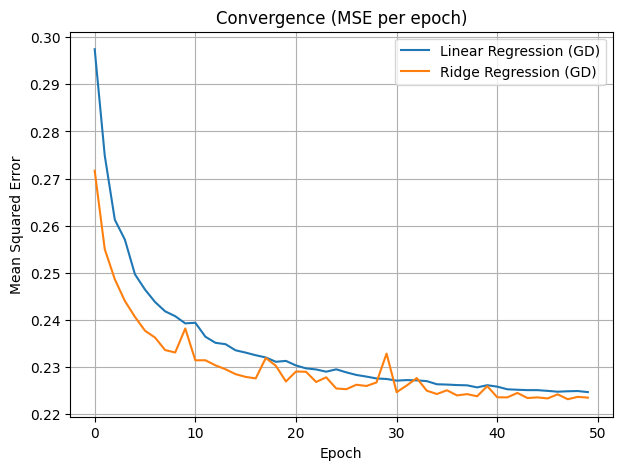

In [11]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST using Hugging Face
trainset = load_dataset('mnist', split='train')
testset = load_dataset('mnist', split='test')

# Convert images to numpy arrays and flatten
X_train = np.array([np.array(img['image']).flatten() for img in trainset], dtype=np.float32) / 255.0
y_train = np.array([img['label'] for img in trainset], dtype=np.int32)

X_test = np.array([np.array(img['image']).flatten() for img in testset], dtype=np.float32) / 255.0
y_test = np.array([img['label'] for img in testset], dtype=np.int32)

# Filter digits 7 and 9
def filter_digits(X, y, digits=(7, 9)):
    mask = np.isin(y, digits)
    X = X[mask]
    y = y[mask]
    y = np.where(y == digits[1], 1, -1)  # +1 for 9, -1 for 7
    return X, y

X_train, y_train = filter_digits(X_train, y_train)
X_test, y_test = filter_digits(X_test, y_test)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

class Optimizer():
  def __init__(self, lr, annealing_rate, batch_size, max_epochs):
    self.lr = lr
    self.annealing_rate = annealing_rate
    self.batch_size = batch_size
    self.max_epochs = max_epochs

def linear_regression_gd(X, y, op):
  n = X.shape[0]
  w = np.zeros(X.shape[1])
  lr = op.lr
  errors = np.zeros(op.max_epochs)

  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]

      # vectorization to compute gradients for each mini batch (XᵀXw - Xᵀy)
      w_grad = X_batch.T @ X_batch @ w - X_batch.T @ y_batch
      w -= lr * w_grad / X_batch.shape[0]

    diff = X @ w - y
    errors[epoch] = np.sum(diff * diff) / n
    lr *= op.annealing_rate

  return w, errors

# Ridge Regression Closed Form
def ridge_regression_closed(X, y, lam):
    n, d = X.shape
    I = np.eye(d)
    return np.linalg.inv(X.T @ X + lam * I) @ (X.T @ y)

# Ridge Regression Gradient Descent
def ridge_regression_gd(X, y, op, lam):
  n = X.shape[0]
  w = np.zeros(X.shape[1])
  lr = op.lr
  errors = np.zeros(op.max_epochs)

  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]


      # Gradient: (2 * Xᵀ(Xw - y))/batch_size + 2λw
      w_grad = (2 * X_batch.T @ (X_batch @ w - y_batch)) + 2*lam * w
      w -= lr * w_grad / X_batch.shape[0]

    diff = X @ w - y
    errors[epoch] = np.sum(diff * diff) / n
    lr *= op.annealing_rate

  return w, errors

# Accuracy helper function
def accuracy(X, y, w):
    preds = np.sign(X @ w)
    return np.mean(preds == y)

# setting optimizer values, and lambda value
op = Optimizer(lr=0.01, annealing_rate=0.99, batch_size=128, max_epochs=50)
lam = 1.0

# Linear Regression (GD)
w_linear, errors_linear = linear_regression_gd(X_train, y_train, op)
acc_linear_train = accuracy(X_train, y_train, w_linear)
acc_linear_test = accuracy(X_test, y_test, w_linear)

# Ridge Regression (GD)
w_ridge_gd, errors_ridge_gd = ridge_regression_gd(X_train, y_train, op, lam)
acc_ridge_gd_train = accuracy(X_train, y_train, w_ridge_gd)
acc_ridge_gd_test = accuracy(X_test, y_test, w_ridge_gd)

# Ridge Regression (Closed-form)
w_ridge_closed = ridge_regression_closed(X_train, y_train, lam)
acc_ridge_closed_train = accuracy(X_train, y_train, w_ridge_closed)
acc_ridge_closed_test = accuracy(X_test, y_test, w_ridge_closed)

print("\nResults:\n")
print(f"Linear Regression (GD):     Train={acc_linear_train:.3f}, Test={acc_linear_test:.3f}")
print(f"Ridge Regression (GD):      Train={acc_ridge_gd_train:.3f}, Test={acc_ridge_gd_test:.3f}")
print(f"Ridge Regression (Closed):  Train={acc_ridge_closed_train:.3f}, Test={acc_ridge_closed_test:.3f}")


print("\nConvergence:\n")
plt.figure(figsize=(7,5))
plt.plot(errors_linear, label="Linear Regression (GD)")
plt.plot(errors_ridge_gd, label="Ridge Regression (GD)")
plt.title("Convergence (MSE per epoch)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

**Part 4.2** (10 marks) Implement the SGD for LASSO and compare its solution with that of [the linear regression method](https://colab.research.google.com/drive/1qMWyoqylJpDEbMwtcSGLZJzhJsOyWW8r) in the Boston House data set. Discuss your findings.



Processing file 1IZf0tFGW3Zv3Ax5gxKgnklHe1DUI7CAI boston.csv
Data shape: (506, 13)
Target shape: (506,)

Mean Squared Errors

Linear Regression (GD): 530.05423
LASSO (SGD):            536.18161


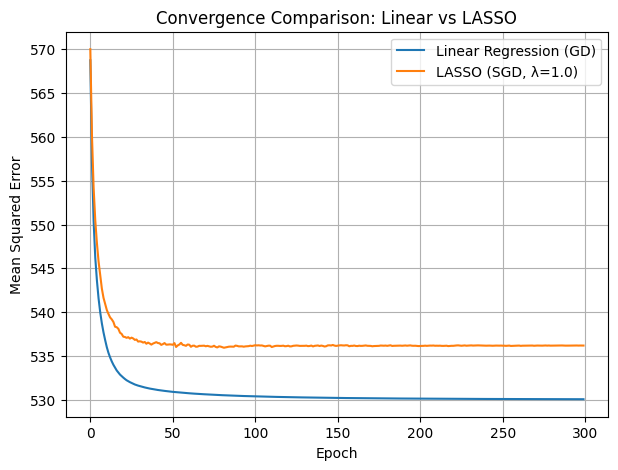

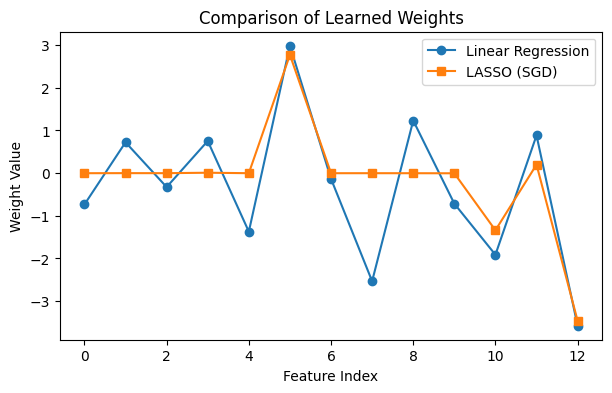

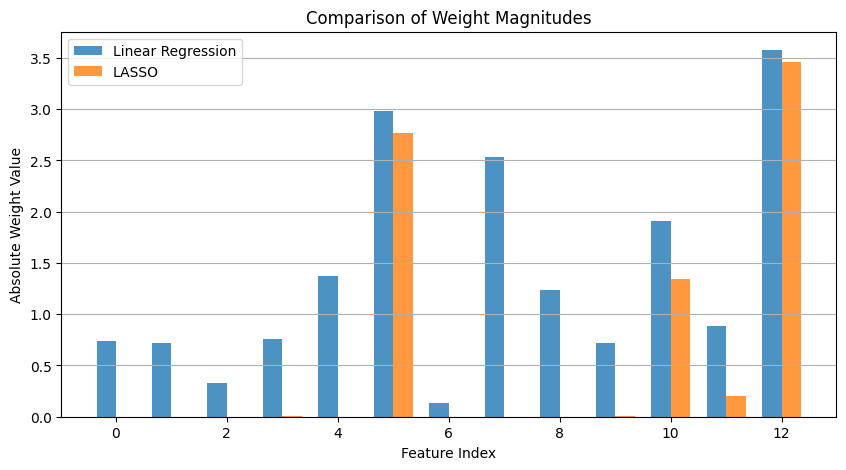

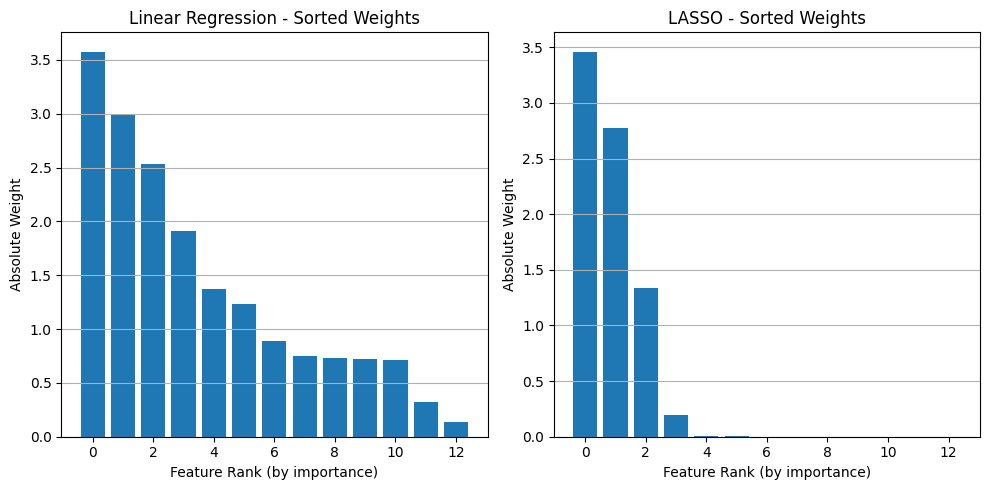

In [12]:
!gdown --folder https://drive.google.com/drive/folders/12L9XNwhIH2wQBa4-IdQrhsrtgRFbeIMZ 2> /dev/null

import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

raw_data = pd.read_csv('Boston/boston.csv', header=None)
data_rows = np.reshape(raw_data.to_numpy(), (506,14))
data = data_rows[:, :13]
target = data_rows[:, 13]

# Normalize input features to zero-mean and unit-variance
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print("Data shape:", data.shape)
print("Target shape:", target.shape)

class Optimizer():
    def __init__(self, lr, annealing_rate, batch_size, max_epochs):
        self.lr = lr
        self.annealing_rate = annealing_rate
        self.batch_size = batch_size
        self.max_epochs = max_epochs

def linear_regression_gd(X, y, op):
    n = X.shape[0]
    w = np.zeros(X.shape[1])
    lr = op.lr
    errors = np.zeros(op.max_epochs)

    for epoch in range(op.max_epochs):
        indices = np.random.permutation(n)
        for batch_start in range(0, n, op.batch_size):
            X_batch = X[indices[batch_start:batch_start + op.batch_size]]
            y_batch = y[indices[batch_start:batch_start + op.batch_size]]

            # vectorization to compute gradients for each mini batch (XᵀXw - Xᵀy)
            w_grad = X_batch.T @ (X_batch @ w - y_batch)
            w -= lr * w_grad / X_batch.shape[0]

        diff = X @ w - y
        errors[epoch] = np.mean(diff**2)
        lr *= op.annealing_rate

    return w, errors

def lasso_sgd(X, y, op, lam=0.1):
    n, d = X.shape
    w = np.zeros(d)
    lr = op.lr
    errors = np.zeros(op.max_epochs)

    for epoch in range(op.max_epochs):
        indices = np.random.permutation(n)
        for batch_start in range(0, n, op.batch_size):
            X_batch = X[indices[batch_start:batch_start + op.batch_size]]
            y_batch = y[indices[batch_start:batch_start + op.batch_size]]

            w_grad = X_batch.T @ (X_batch @ w - y_batch) / X_batch.shape[0] + lam * np.sign(w)

            # Gradient descent step
            w -= lr * w_grad

        diff = X @ w - y
        errors[epoch] = np.mean(diff**2)
        lr *= op.annealing_rate

    return w, errors


#op = Optimizer(lr=0.000001, annealing_rate=0.99, batch_size=32, max_epochs=200)
#lam = 0.0002

#op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=2, max_epochs=100)
#lam = 0.1

op = Optimizer(
    lr=0.01,
    annealing_rate=0.99,
    batch_size=64,
    max_epochs=300
)
lam = 1.0

w_linear, errors_linear = linear_regression_gd(data, target, op)
w_lasso, errors_lasso = lasso_sgd(data, target, op, lam)

print("\nMean Squared Errors\n")
print(f"Linear Regression (GD): {np.mean((data @ w_linear - target)**2):.5f}")
print(f"LASSO (SGD):            {np.mean((data @ w_lasso - target)**2):.5f}")

#convergence comparison
plt.figure(figsize=(7,5))
plt.plot(errors_linear, label="Linear Regression (GD)")
plt.plot(errors_lasso, label=f"LASSO (SGD, λ={lam})")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Convergence Comparison: Linear vs LASSO")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(7,4))
plt.plot(w_linear, 'o-', label='Linear Regression')
plt.plot(w_lasso, 's-', label='LASSO (SGD)')
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")
plt.title("Comparison of Learned Weights")
plt.legend()
plt.show()


# bar chart: weight magnitudes
plt.figure(figsize=(10, 5))
x = np.arange(len(w_linear))
width = 0.35

plt.bar(x - width/2, np.abs(w_linear), width, label='Linear Regression', alpha=0.8)
plt.bar(x + width/2, np.abs(w_lasso), width, label='LASSO', alpha=0.8)
plt.xlabel("Feature Index")
plt.ylabel("Absolute Weight Value")
plt.title("Comparison of Weight Magnitudes")
plt.legend()
plt.grid(True, axis='y')
plt.show()

# sorted comparison of weights
plt.figure(figsize=(10, 5))
sorted_idx_linear = np.argsort(np.abs(w_linear))[::-1]
sorted_idx_lasso = np.argsort(np.abs(w_lasso))[::-1]

plt.subplot(1, 2, 1)
plt.bar(range(13), np.abs(w_linear)[sorted_idx_linear])
plt.xlabel("Feature Rank (by importance)")
plt.ylabel("Absolute Weight")
plt.title("Linear Regression - Sorted Weights")
plt.grid(True, axis='y')

plt.subplot(1, 2, 2)
plt.bar(range(13), np.abs(w_lasso)[sorted_idx_lasso])
plt.xlabel("Feature Rank (by importance)")
plt.ylabel("Absolute Weight")
plt.title("LASSO - Sorted Weights")
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

**4.2 Discussion of Findings**

Initially, I tried several different hyperperameters to try and find the optimum results using the mean squared error (MSE) as a metric. The outcome was that when γ = 0.1, they both had a fairly similar MSE (approximately 530). The two models' convergence also appeared to be fairly similar.

The two functions near equal output at small values of λ are clear when we compare their objective functions:

$$
w_{\text{lasso}}^{*} = \arg\min_{w} \left[ \frac{1}{2} \sum_{i=1}^{N} \left( w^{\top} x_{i} - y_{i} \right)^{2} + \lambda \lVert w \rVert_{1} \right]$$


$$E(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{N} \big( \mathbf{w}^{\intercal} \mathbf{x}_{i} - y_{i} \big)^{2}$$

As we can see, having a small value of λ means that the only difference between the two is that LASSO adds attenuates its prediction very slightly as L1 w has a small coefficient.

This changes radically when we increase the size of λ resulting in the essential tradeoff which is produced by LASSO: a higher MSE but overall more sparsity in model weights. This can be seen in the above "matplot" charts which highlights the feature selection which is achieved by LASSO. Compared to linear regression, it was able to effectively shrink the total amount of important features from 12 to 4. By increasing the λ further to 2.0, I observed that it decreased even further to 3 features.

This tradeoff can be very useful and desirables in applications where data collection may be costly, and/or the number of features in a data set are very high. By reducing the number of features to a subset of essential, we can reduce costs while still achieving useful model that is intuitive to interpet. This is a contrast from other approaches such as PCA. Although it too reduces the number of features, the original principal components are now modeled as a *composite* of features rather than a subset. In this way, the task of analyzing and interpreting the results of PCA is more abstract than LASSO.